###  Using the World Bank API with Python
In this project, we utilize the World Bank Open Data API to extract and analyze key health and economic indicators for Saudi Arabia. This API provides reliable, up-to-date global data across sectors such as health, education, economy, and environment.

### Objective:
To fetch multiple time-series indicators directly from the API, combine them into a unified DataFrame, and perform visualization and basic analysis.

### Why use the World Bank API?
No need to manually download CSV files

Always up-to-date with official data

Fully customizable: choose countries, years, and indicators

### Selected Indicators:
Male and Female Life Expectancy

Infant Mortality Rate

Fertility Rate

Health Expenditure (% of GDP)

### Tools & Libraries:
requests – to fetch data from the API

pandas – for data cleaning and merging

matplotlib and seaborn – for data visualization

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [5]:
indicators = {
    'SP.DYN.LE00.MA.IN': 'Male Life Expectancy',
    'SP.DYN.LE00.FE.IN': 'Female Life Expectancy',
    'SP.DYN.IMRT.IN': 'Infant Mortality Rate',
    'SP.DYN.TFRT.IN': 'Fertility Rate',
    'SH.XPD.CHEX.GD.ZS': 'Health Expenditure (% GDP)'
}


country = 'SA'


df_all = pd.DataFrame()

for code, name in indicators.items():
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{code}?format=json&per_page=100"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200 or len(data) < 2:
        print(f"❌ Failed for: {name}")
        continue

    temp = pd.DataFrame({
        'Year': [int(i['date']) for i in data[1] if i['value'] is not None],
        name: [i['value'] for i in data[1] if i['value'] is not None]
    })

    if df_all.empty:
        df_all = temp
    else:
        df_all = pd.merge(df_all, temp, on='Year', how='outer')

df_all = df_all.sort_values('Year').dropna(how='all')


print(df_all.head())


   Year  Male Life Expectancy  Female Life Expectancy  Infant Mortality Rate  \
0  1960                43.219                  47.671                    NaN   
1  1961                43.800                  48.229                    NaN   
2  1962                44.398                  48.806                    NaN   
3  1963                45.026                  49.406                    NaN   
4  1964                45.691                  50.029                    NaN   

   Fertility Rate  Health Expenditure (% GDP)  
0           7.626                         NaN  
1           7.634                         NaN  
2           7.636                         NaN  
3           7.654                         NaN  
4           7.672                         NaN  


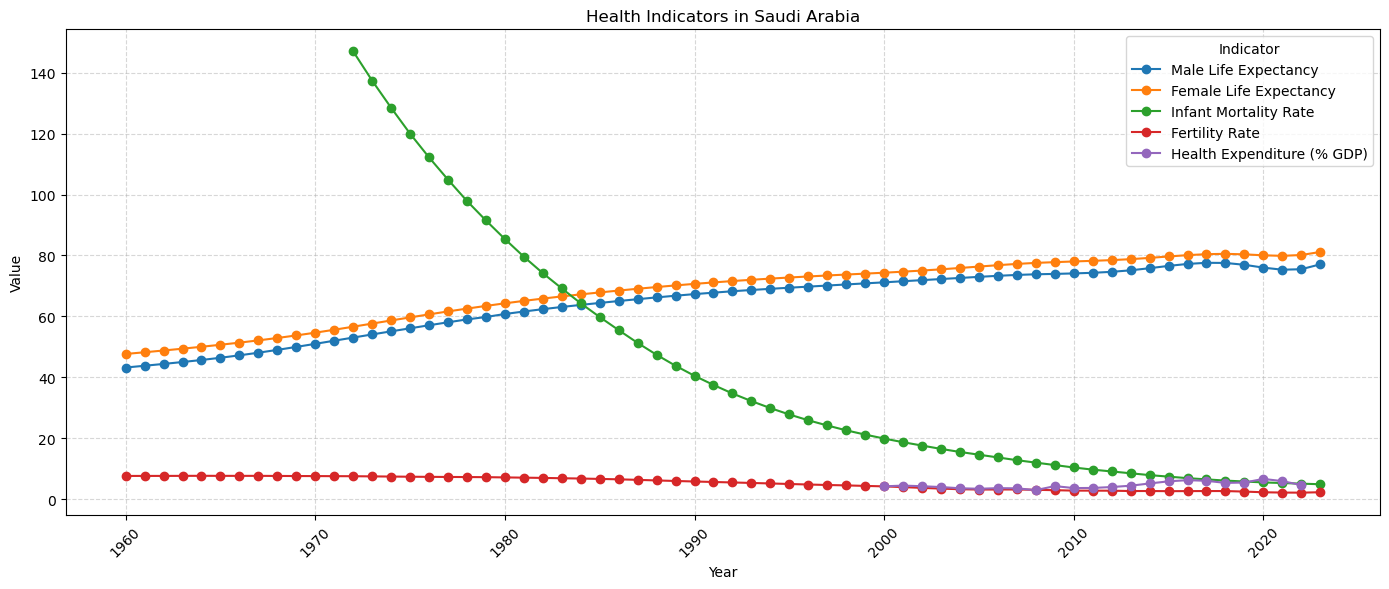

In [6]:

plt.figure(figsize=(14, 6))

for column in df_all.columns:
    if column != 'Year':
        plt.plot(df_all['Year'], df_all[column], marker='o', label=column)

plt.title("Health Indicators in Saudi Arabia")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title="Indicator", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Health Transformation in Saudi Arabia (1960–2023) 
### This chart highlights key health indicators in Saudi Arabia:

### Life Expectancy has improved steadily for both males and females

### Infant Mortality Rate dropped dramatically from >140 to <5 per 1,000

### Fertility Rate decreased from 7+ to <3

### Health Spending as % of GDP remained stable and focused

### Data sourced from the World Bank Open API, visualized using Python and Matplotlib.

### This analysis demonstrates how data storytelling can reflect decades of health improvement and policy success aligned with Saudi Vision 2030.